- https://www.kaggle.com/fedesoriano/cirrhosis-prediction-dataset.

- Liver Cirrhosis Prediction with XGboost & EDA - ARJUN BHAYBHANG
  - https://www.kaggle.com/code/arjunbhaybhang/liver-cirrhosis-prediction-with-xgboost-eda
- EDA on Cirrhosis Prediction Dataset - EMRE ARSLAN
  - https://www.kaggle.com/code/emrearslan123/eda-on-cirrhosis-prediction-dataset
- Cirrhousus - MICHAEL MEEKER
  - https://www.kaggle.com/code/michaelmeeker/cirrhousus
- Cirrhosis-Prediction - PRITHVIRAJ
  - https://www.kaggle.com/code/prithviraj7387/cirrhosis-prediction

1) `ID`: unique identifier
2) `N_Days`: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3) `Status`: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4) `Drug`: type of drug D-penicillamine or placebo
5) `Age`: age in [days]
6) `Sex`: M (male) or F (female)
7) `Ascites`: presence of ascites N (No) or Y (Yes)
8) `Hepatomegaly`: presence of hepatomegaly N (No) or Y (Yes)
9) `Spiders`: presence of spiders N (No) or Y (Yes)
10) `Edema`: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11) `Bilirubin`: serum bilirubin in [mg/dl]
12) `Cholesterol`: serum cholesterol in [mg/dl]
13) `Albumin`: albumin in [gm/dl]
14) `Copper`: urine copper in [ug/day]
15) `Alk_Phos`: alkaline phosphatase in [U/liter]
16) `SGOT`: SGOT in [U/ml]
17) `Triglycerides`: triglicerides in [mg/dl]
18) `Platelets`: platelets per cubic [ml/1000]
19) `Prothrombin`: prothrombin time in seconds [s]
20) `Stage`: histologic stage of disease (1, 2, 3, or 4)

In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from collections import defaultdict
import warnings

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# (1) Data 불러오기

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/countifs/kaggle/main/6.%20Cirrhosis%20Prediction%20Dataset/cirrhosis.csv')

In [32]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [33]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [35]:
df.select_dtypes(include=['int64'])

,ID,N_Days,Age
0,1,400,21464
1,2,4500,20617
2,3,1012,25594
3,4,1925,19994
4,5,1504,13918
...,...,...,...
413,414,681,24472
414,415,1103,14245
415,416,1055,20819
416,417,691,21185


In [36]:
df.select_dtypes(include=['object']).columns

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [37]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [38]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


# (2) 전처리

## (2.1) 나이 변환

In [39]:
df['Age'] = df['Age']/365

In [40]:
df['Age'] = df['Age'].astype('int64')

In [41]:
df['Age']

0      58
1      56
2      70
3      54
4      38
       ..
413    67
414    39
415    57
416    58
417    53
Name: Age, Length: 418, dtype: int64

## (2.2) Missing value 제거

In [43]:
import missingno as msno

In [44]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

<AxesSubplot:>

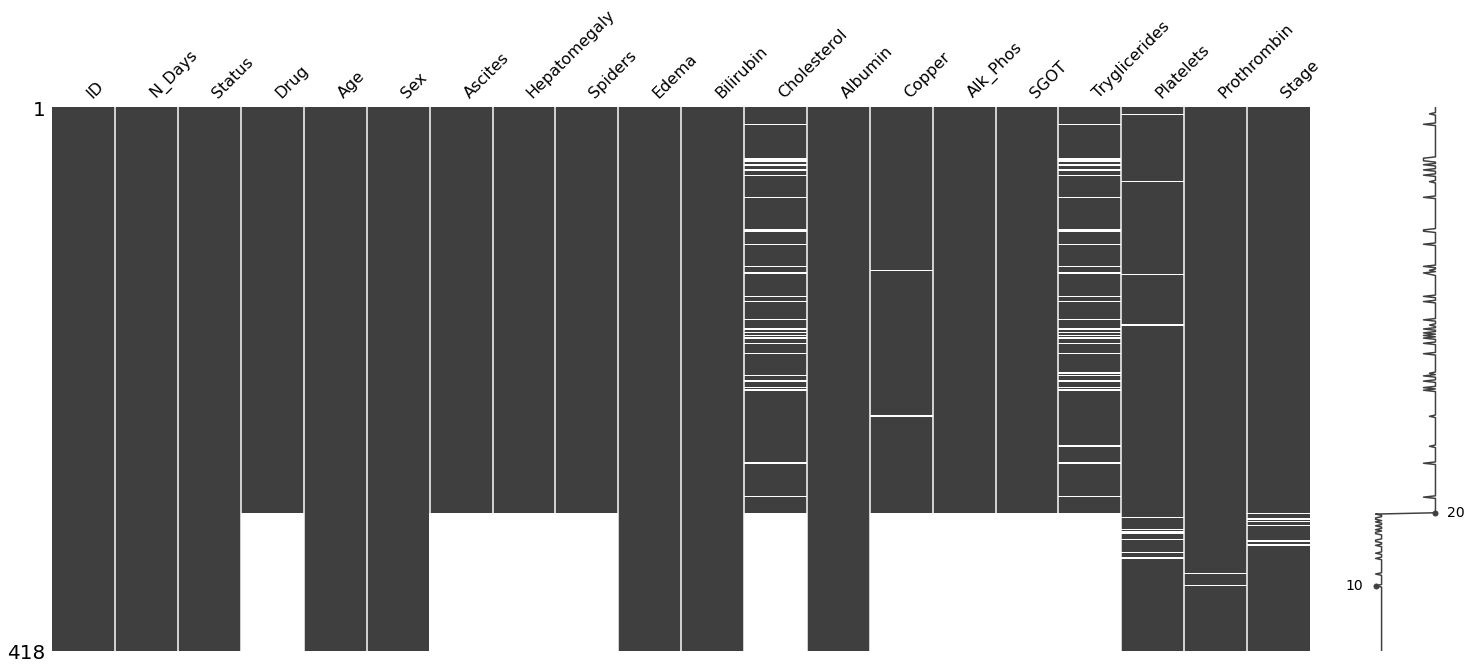

In [45]:
msno.matrix(df)

<AxesSubplot:>

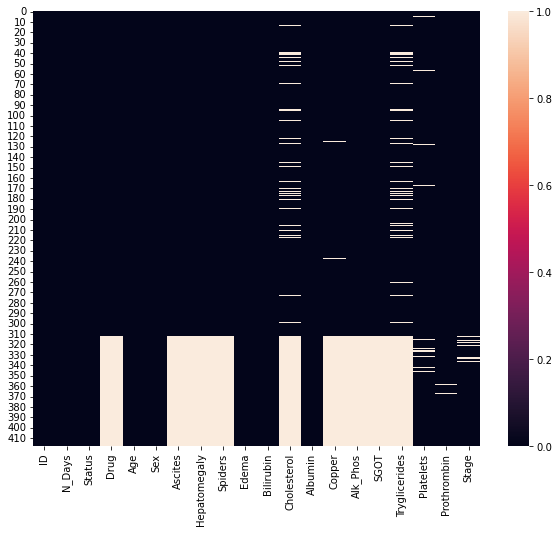

In [46]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.isnull())

In [47]:
df.dropna(inplace=True)

<AxesSubplot:>

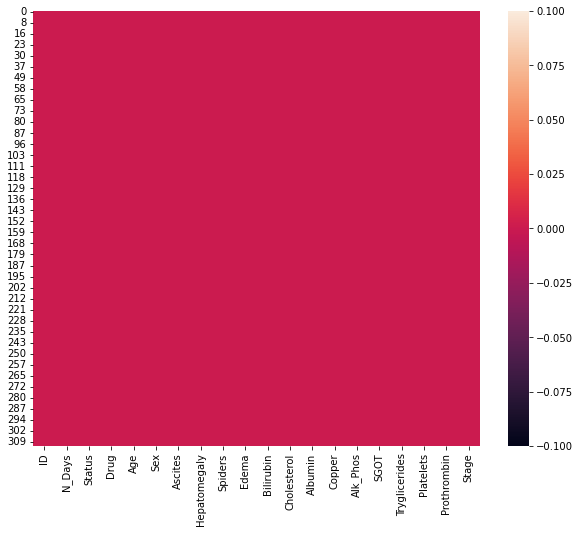

In [48]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.isnull())

In [49]:
len(df)

276

## (2.3) Class 값 변환

In [52]:
# Class 값 확인
df_object_columns = df.select_dtypes(include=['object']).columns
print()

for i in df_object_columns:
    print('컬럼명 : ', i )
    print(df[i].value_counts())
    print("=================================")
    print()

In [53]:
# Class 속성 값 변경
for i in df_object_columns:
    print(f'Catagory of {i}')
    catlist = df[i].unique()
    for j, val in enumerate(catlist):
         dftobjfinal = df[i].replace({val:j},inplace=True)
         #print(dftobjfinal)
         print(j,val)
    print('--------------------------------')

## (2.4) 'Stage' 데이터 타입 변경

In [54]:
df['Stage'] = df['Stage'].astype('int64')

In [55]:
df['Stage'].dtype

dtype('int64')

## (2.5) 'ID' 삭제

In [56]:
df.drop(columns='ID', inplace = True)

## (2.6) 인덱스 리셋

In [57]:
df.reset_index(inplace=True, drop=True)

In [58]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,0,0,58,0,0,0,0,0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,4500,1,0,56,0,1,0,0,1,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,1012,0,0,70,1,1,1,1,2,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,1925,0,0,54,0,1,0,0,2,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1504,2,1,38,0,1,0,0,1,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1153,1,0,61,0,1,0,1,1,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
272,994,1,1,58,0,1,1,1,1,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
273,939,1,0,62,0,1,1,1,1,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
274,839,1,0,38,0,1,1,1,1,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         276 non-null    int64  
 1   Status         276 non-null    int64  
 2   Drug           276 non-null    int64  
 3   Age            276 non-null    int64  
 4   Sex            276 non-null    int64  
 5   Ascites        276 non-null    int64  
 6   Hepatomegaly   276 non-null    int64  
 7   Spiders        276 non-null    int64  
 8   Edema          276 non-null    int64  
 9   Bilirubin      276 non-null    float64
 10  Cholesterol    276 non-null    float64
 11  Albumin        276 non-null    float64
 12  Copper         276 non-null    float64
 13  Alk_Phos       276 non-null    float64
 14  SGOT           276 non-null    float64
 15  Tryglicerides  276 non-null    float64
 16  Platelets      276 non-null    float64
 17  Prothrombin    276 non-null    float64
 18  Stage     

In [60]:
df.nunique()

N_Days           267
Status             3
Drug               2
Age               49
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         82
Cholesterol      198
Albumin          125
Copper           152
Alk_Phos         269
SGOT             166
Tryglicerides    143
Platelets        193
Prothrombin       41
Stage              4
dtype: int64

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,276.0,1979.166667,1112.380295,41.00,1185.7500,1788.000,2689.7500,4556.00
Status,276.0,0.663043,0.595935,0.00,0.0000,1.000,1.0000,2.00
Drug,276.0,0.507246,0.500856,0.00,0.0000,1.000,1.0000,1.00
Age,276.0,49.322464,10.523791,26.00,41.0000,49.000,56.0000,78.00
Sex,276.0,0.123188,0.329250,0.00,0.0000,0.000,0.0000,1.00
Ascites,276.0,0.931159,0.253643,0.00,1.0000,1.000,1.0000,1.00
Hepatomegaly,276.0,0.485507,0.500698,0.00,0.0000,0.000,1.0000,1.00
Spiders,276.0,0.710145,0.454519,0.00,0.0000,1.000,1.0000,1.00
Edema,276.0,1.028986,0.389723,0.00,1.0000,1.000,1.0000,2.00
Bilirubin,276.0,3.333696,4.601074,0.30,0.8000,1.400,3.5250,28.00


# (3) EDA 시작

In [63]:
target_name='Stage'
df_y4 = df[df[target_name]==4]
df_y3 = df[df[target_name]==3]
df_y2 = df[df[target_name]==2]
df_y1 = df[df[target_name]==1]

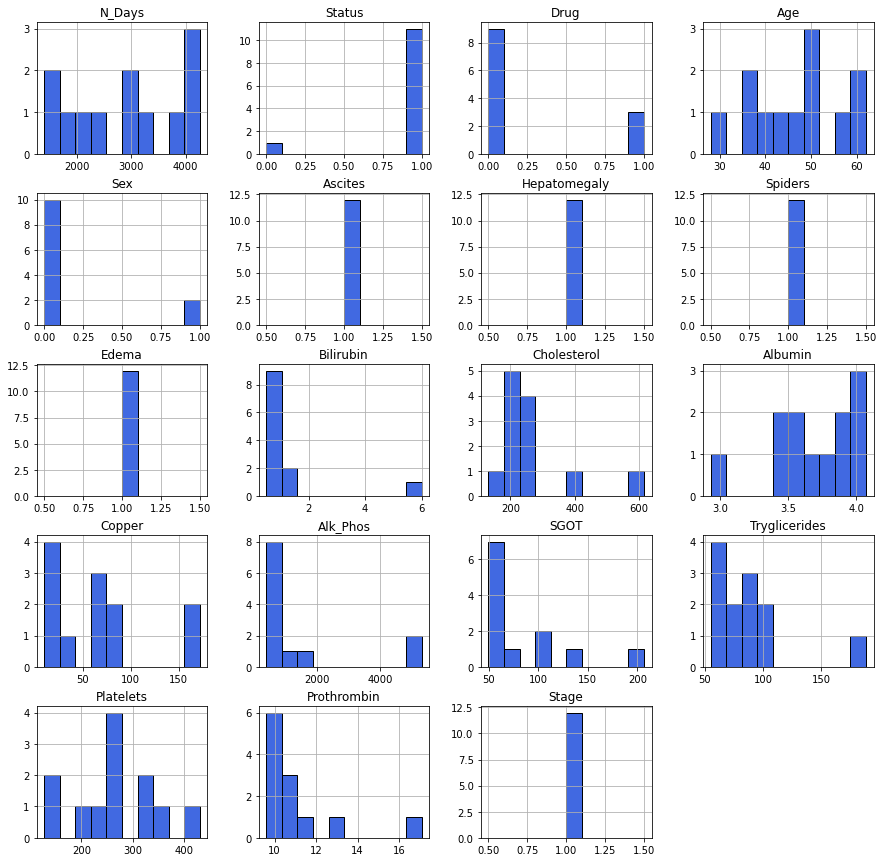

In [64]:
df_y1.hist(figsize=(15,15),bins=10, edgecolor = 'black', color='royalblue' )
plt.show()

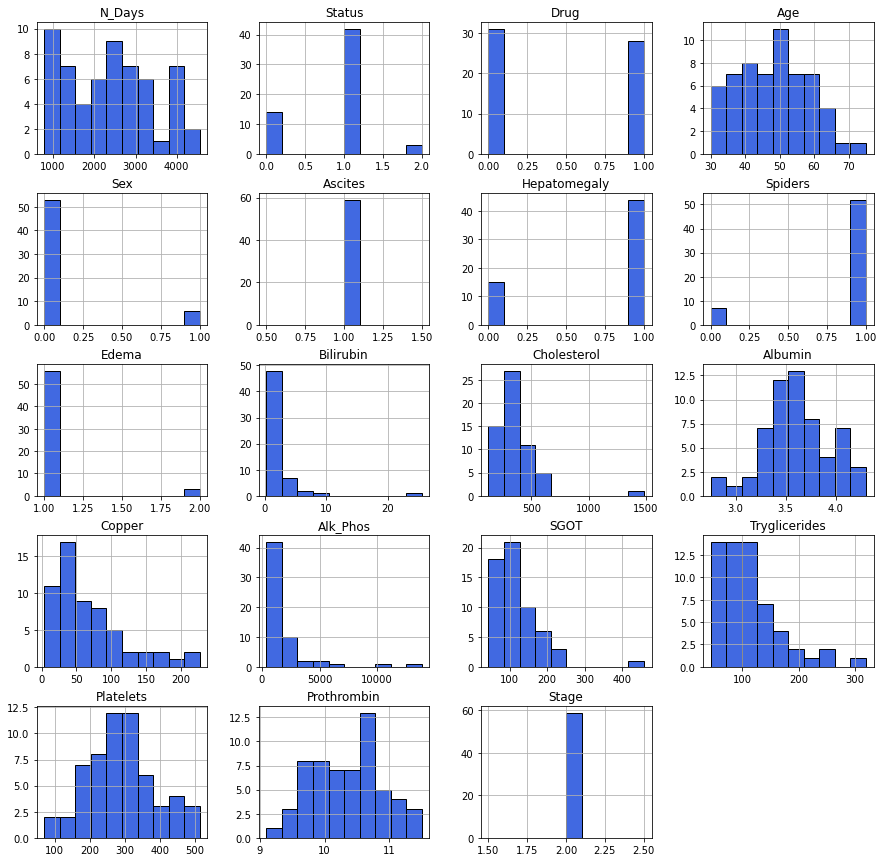

In [65]:
df_y2.hist(figsize=(15,15),bins=10, edgecolor = 'black', color='royalblue')
plt.show()

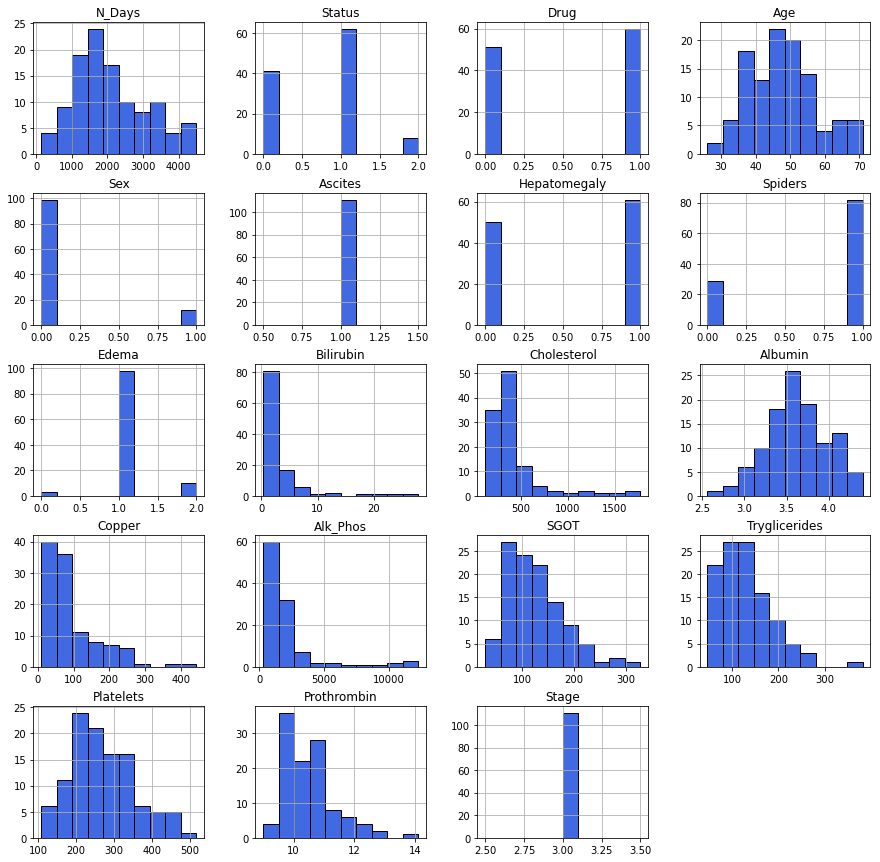

In [66]:
df_y3.hist(figsize=(15,15),bins=10, edgecolor = 'black', color='royalblue')
plt.show()

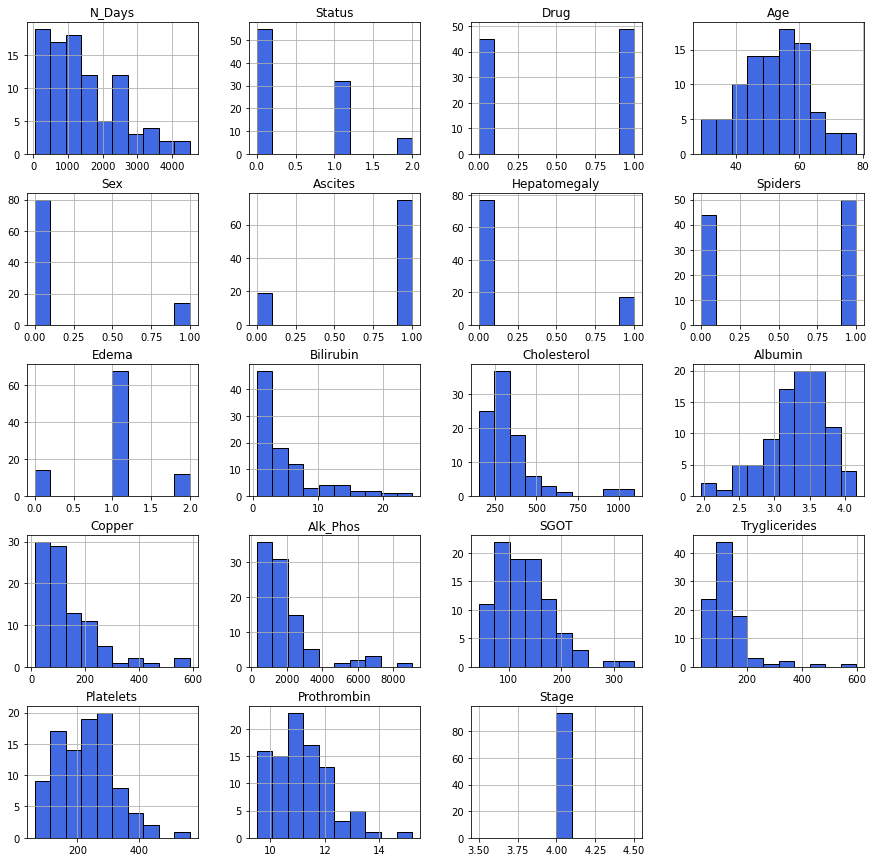

In [67]:
df_y4.hist(figsize=(15,15),bins=10, edgecolor = 'black', color='royalblue')
plt.show()

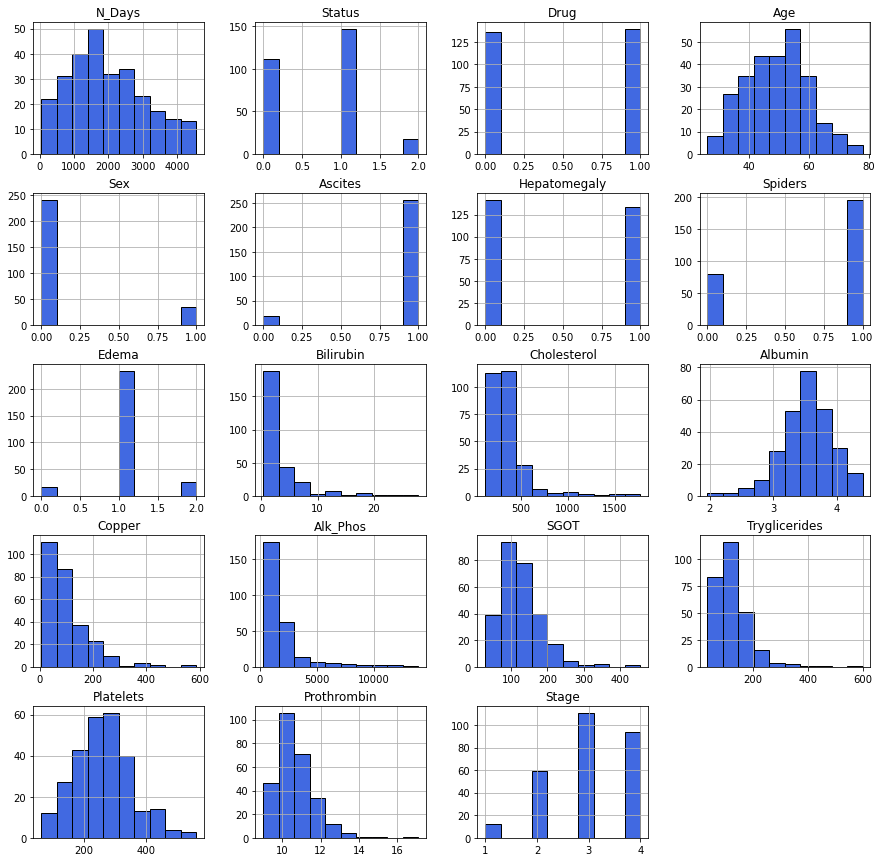

In [68]:
df.hist(figsize=(15,15),bins=10, edgecolor = 'black', color='royalblue')
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         276 non-null    int64  
 1   Status         276 non-null    int64  
 2   Drug           276 non-null    int64  
 3   Age            276 non-null    int64  
 4   Sex            276 non-null    int64  
 5   Ascites        276 non-null    int64  
 6   Hepatomegaly   276 non-null    int64  
 7   Spiders        276 non-null    int64  
 8   Edema          276 non-null    int64  
 9   Bilirubin      276 non-null    float64
 10  Cholesterol    276 non-null    float64
 11  Albumin        276 non-null    float64
 12  Copper         276 non-null    float64
 13  Alk_Phos       276 non-null    float64
 14  SGOT           276 non-null    float64
 15  Tryglicerides  276 non-null    float64
 16  Platelets      276 non-null    float64
 17  Prothrombin    276 non-null    float64
 18  Stage     

In [78]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Count'>

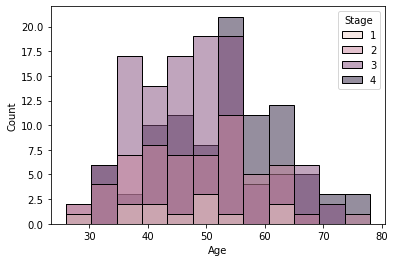

In [79]:
sns.histplot(data = df, x = 'Age', hue = 'Stage')

<AxesSubplot:ylabel='Stage'>

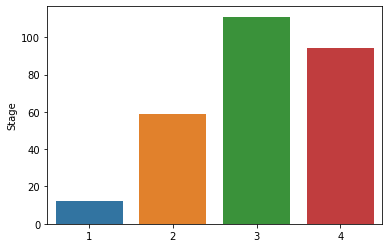

In [80]:
sns.barplot(x=df['Stage'].value_counts().index, y=df['Stage'].value_counts(), data=df)

In [81]:
df['Stage'].value_counts()

3    111
4     94
2     59
1     12
Name: Stage, dtype: int64

In [82]:
df.corr()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,0.240388,0.019330,-0.141656,-0.029385,0.329450,0.261022,0.260605,0.112413,-0.430252,-0.136734,0.401878,-0.361386,0.104443,-0.191062,-0.163853,0.159121,-0.128406,-0.363880
Status,0.240388,1.000000,0.026485,-0.318330,-0.121269,0.279012,0.184658,0.188535,0.073520,-0.348348,-0.105483,0.249232,-0.275588,-0.260678,-0.195924,-0.159840,0.128080,-0.354007,-0.223596
Drug,0.019330,0.026485,1.000000,-0.128420,-0.071586,0.046877,-0.086582,0.009260,-0.038339,0.080922,0.021723,0.053743,-0.028832,-0.009397,0.040706,0.017799,0.039366,0.070773,0.080087
Age,-0.141656,-0.318330,-0.128420,1.000000,0.239317,-0.247766,-0.077438,0.005928,-0.020906,0.076661,-0.156105,-0.236195,0.080690,-0.020896,-0.121896,0.022924,-0.148434,0.243117,0.176189
Sex,-0.029385,-0.121269,-0.071586,0.239317,1.000000,0.014830,-0.055305,0.142273,0.028750,-0.027474,-0.008414,0.079899,0.251731,0.019439,0.008538,0.051218,-0.095021,0.103977,0.034206
Ascites,0.329450,0.279012,0.046877,-0.247766,0.014830,1.000000,0.149598,0.173254,0.314551,-0.414603,0.057578,0.403384,-0.247268,-0.042037,-0.080520,-0.225414,0.211158,-0.361506,-0.306251
Hepatomegaly,0.261022,0.184658,-0.086582,-0.077438,-0.055305,0.149598,1.000000,0.285068,-0.053745,-0.288092,-0.140896,0.271408,-0.224367,-0.132990,-0.136204,-0.162103,0.179722,-0.153115,-0.479132
Spiders,0.260605,0.188535,0.009260,0.005928,0.142273,0.173254,0.285068,1.000000,0.047603,-0.261701,-0.061817,0.225611,-0.267521,-0.035218,-0.091350,-0.102546,0.157704,-0.228985,-0.316755
Edema,0.112413,0.073520,-0.038339,-0.020906,0.028750,0.314551,-0.053745,0.047603,1.000000,-0.066049,0.020980,0.156180,-0.128978,0.009595,-0.103358,0.098933,0.095164,-0.101643,-0.058113
Bilirubin,-0.430252,-0.348348,0.080922,0.076661,-0.027474,-0.414603,-0.288092,-0.261701,-0.066049,1.000000,0.394966,-0.312043,0.460527,0.138787,0.424987,0.439691,-0.074395,0.331176,0.247861


In [83]:
df['Stage'].unique()

array([4, 3, 2, 1], dtype=int64)

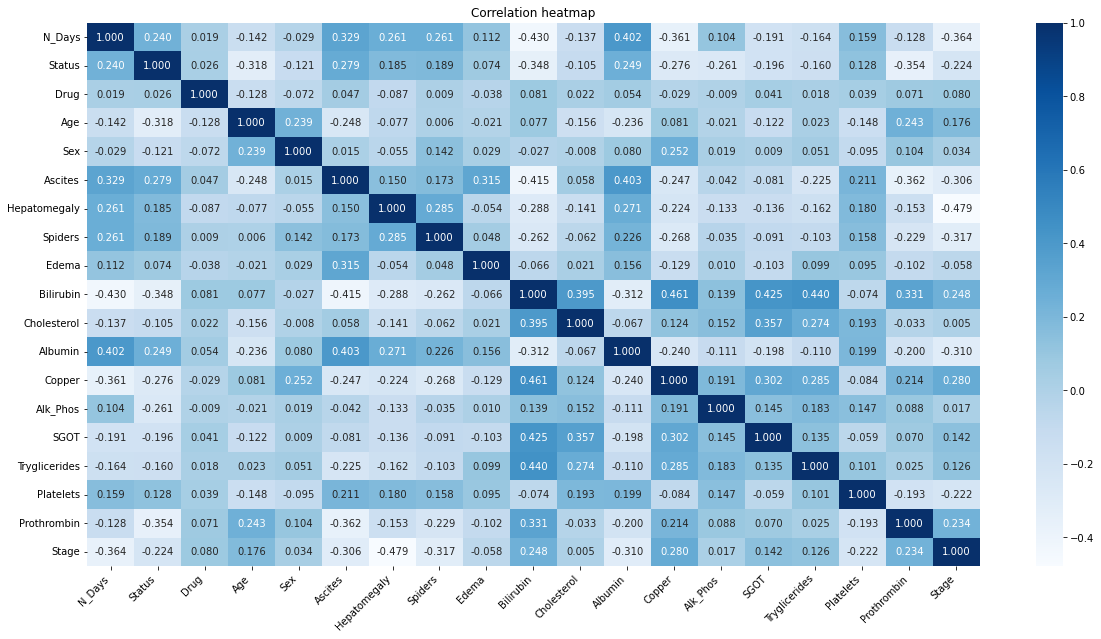

In [84]:
plt.figure(figsize = (20,10))
g = sns.heatmap(df.corr(), annot = True, cmap='Blues', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap')
plt.show()

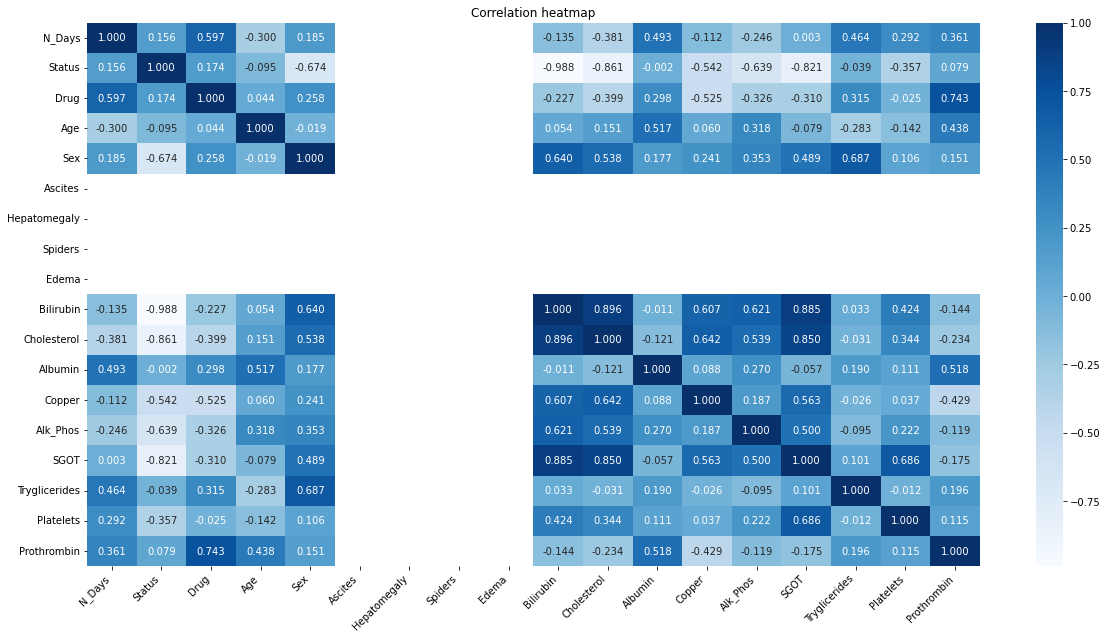

In [85]:
plt.figure(figsize = (20,10))
g = sns.heatmap(df_y1.iloc[:,:-1].corr(), annot = True, cmap='Blues', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap')
plt.show()

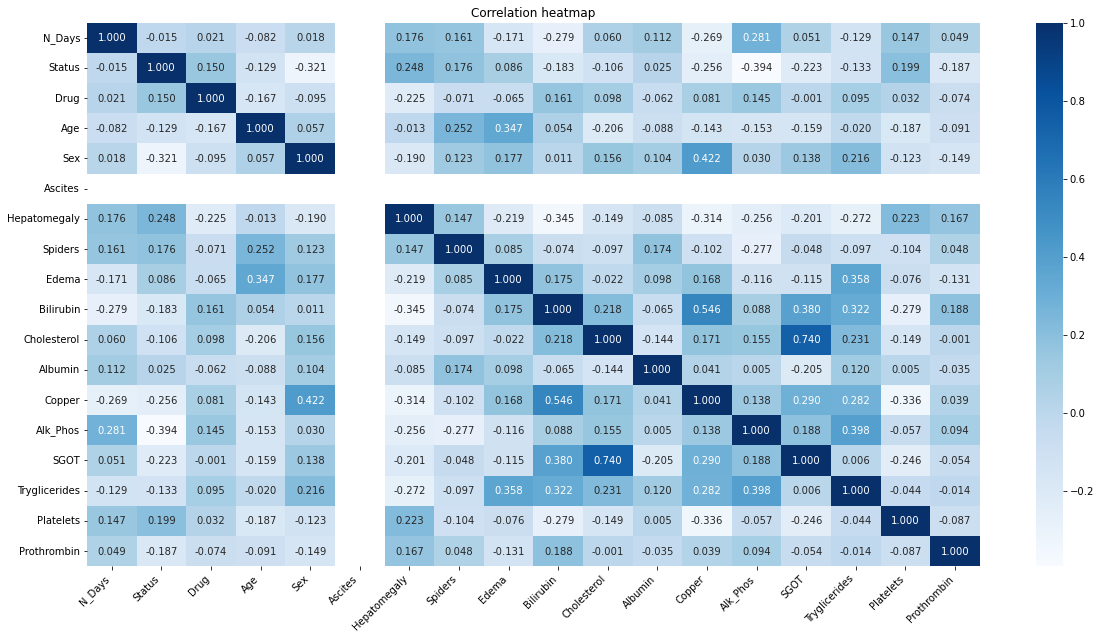

In [86]:
plt.figure(figsize = (20,10))
g = sns.heatmap(df_y2.iloc[:,:-1].corr(), annot = True, cmap='Blues', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap')
plt.show()

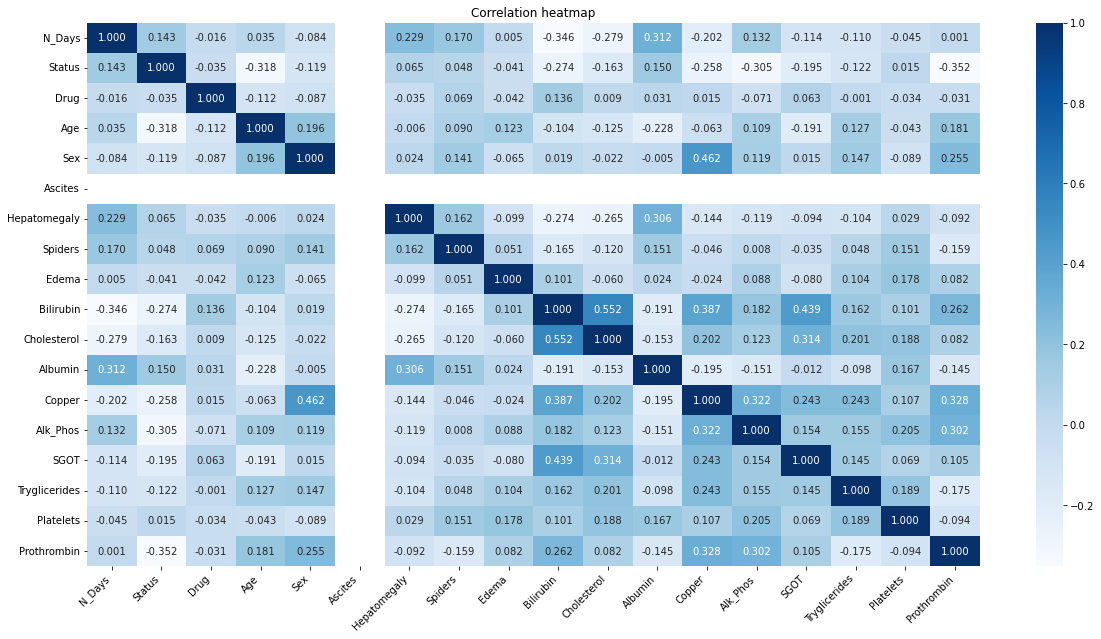

In [87]:
plt.figure(figsize = (20,10))
g = sns.heatmap(df_y3.iloc[:,:-1].corr(), annot = True, cmap='Blues', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap')
plt.show()

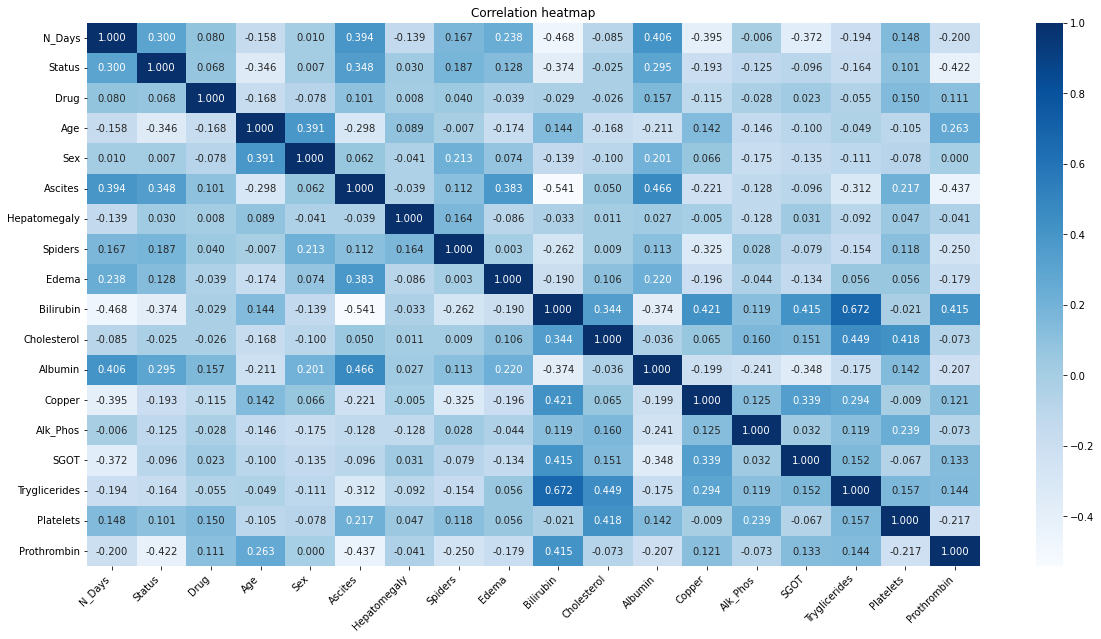

In [88]:
plt.figure(figsize = (20,10))
g = sns.heatmap(df_y4.iloc[:,:-1].corr(), annot = True, cmap='Blues', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap')
plt.show()

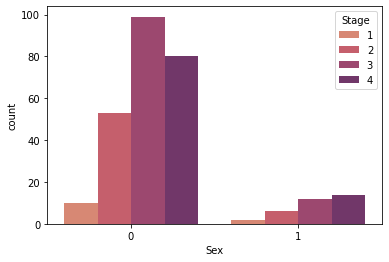

In [89]:
sns.countplot(x="Sex", hue="Stage", data=df, palette='flare')
plt.show()

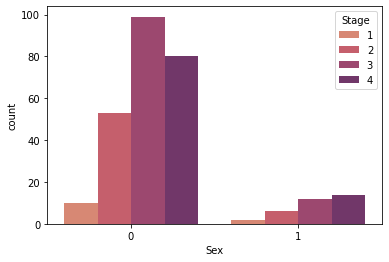

In [90]:
sns.countplot(x="Sex", hue="Stage", data=df, palette='flare')
plt.show()

In [91]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

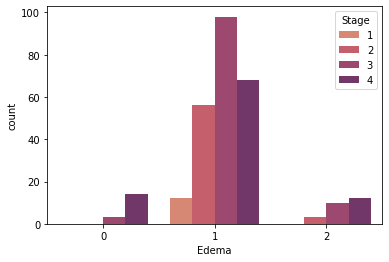

In [92]:
sns.countplot(x="Edema", hue="Stage", data=df, palette='flare')
plt.show()

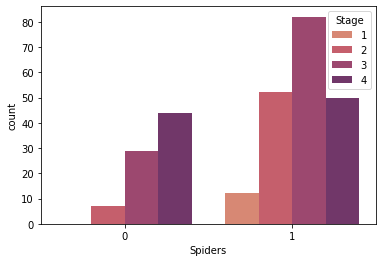

In [93]:
sns.countplot(x="Spiders", hue="Stage", data=df, palette='flare')
plt.show()

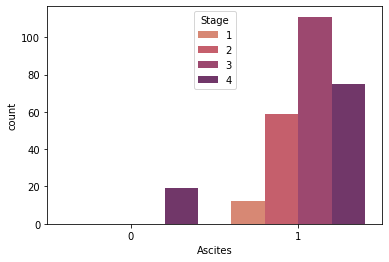

In [94]:
sns.countplot(x="Ascites", hue="Stage", data=df, palette='flare')
plt.show()

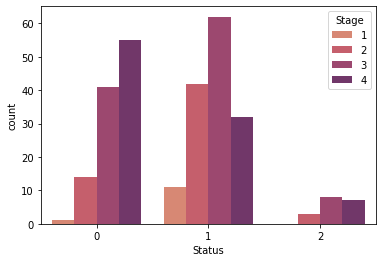

In [95]:
sns.countplot(x="Status", hue="Stage", data=df, palette='flare')
plt.show()

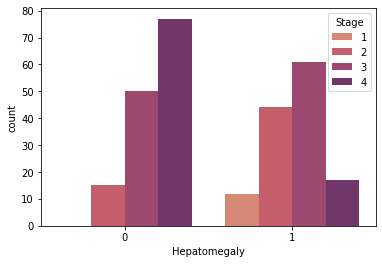

In [96]:
sns.countplot(x="Hepatomegaly", hue="Stage", data=df, palette='flare')
plt.show()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         276 non-null    int64  
 1   Status         276 non-null    int64  
 2   Drug           276 non-null    int64  
 3   Age            276 non-null    int64  
 4   Sex            276 non-null    int64  
 5   Ascites        276 non-null    int64  
 6   Hepatomegaly   276 non-null    int64  
 7   Spiders        276 non-null    int64  
 8   Edema          276 non-null    int64  
 9   Bilirubin      276 non-null    float64
 10  Cholesterol    276 non-null    float64
 11  Albumin        276 non-null    float64
 12  Copper         276 non-null    float64
 13  Alk_Phos       276 non-null    float64
 14  SGOT           276 non-null    float64
 15  Tryglicerides  276 non-null    float64
 16  Platelets      276 non-null    float64
 17  Prothrombin    276 non-null    float64
 18  Stage     

In [100]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

In [101]:
len(df_numeric.columns)

19

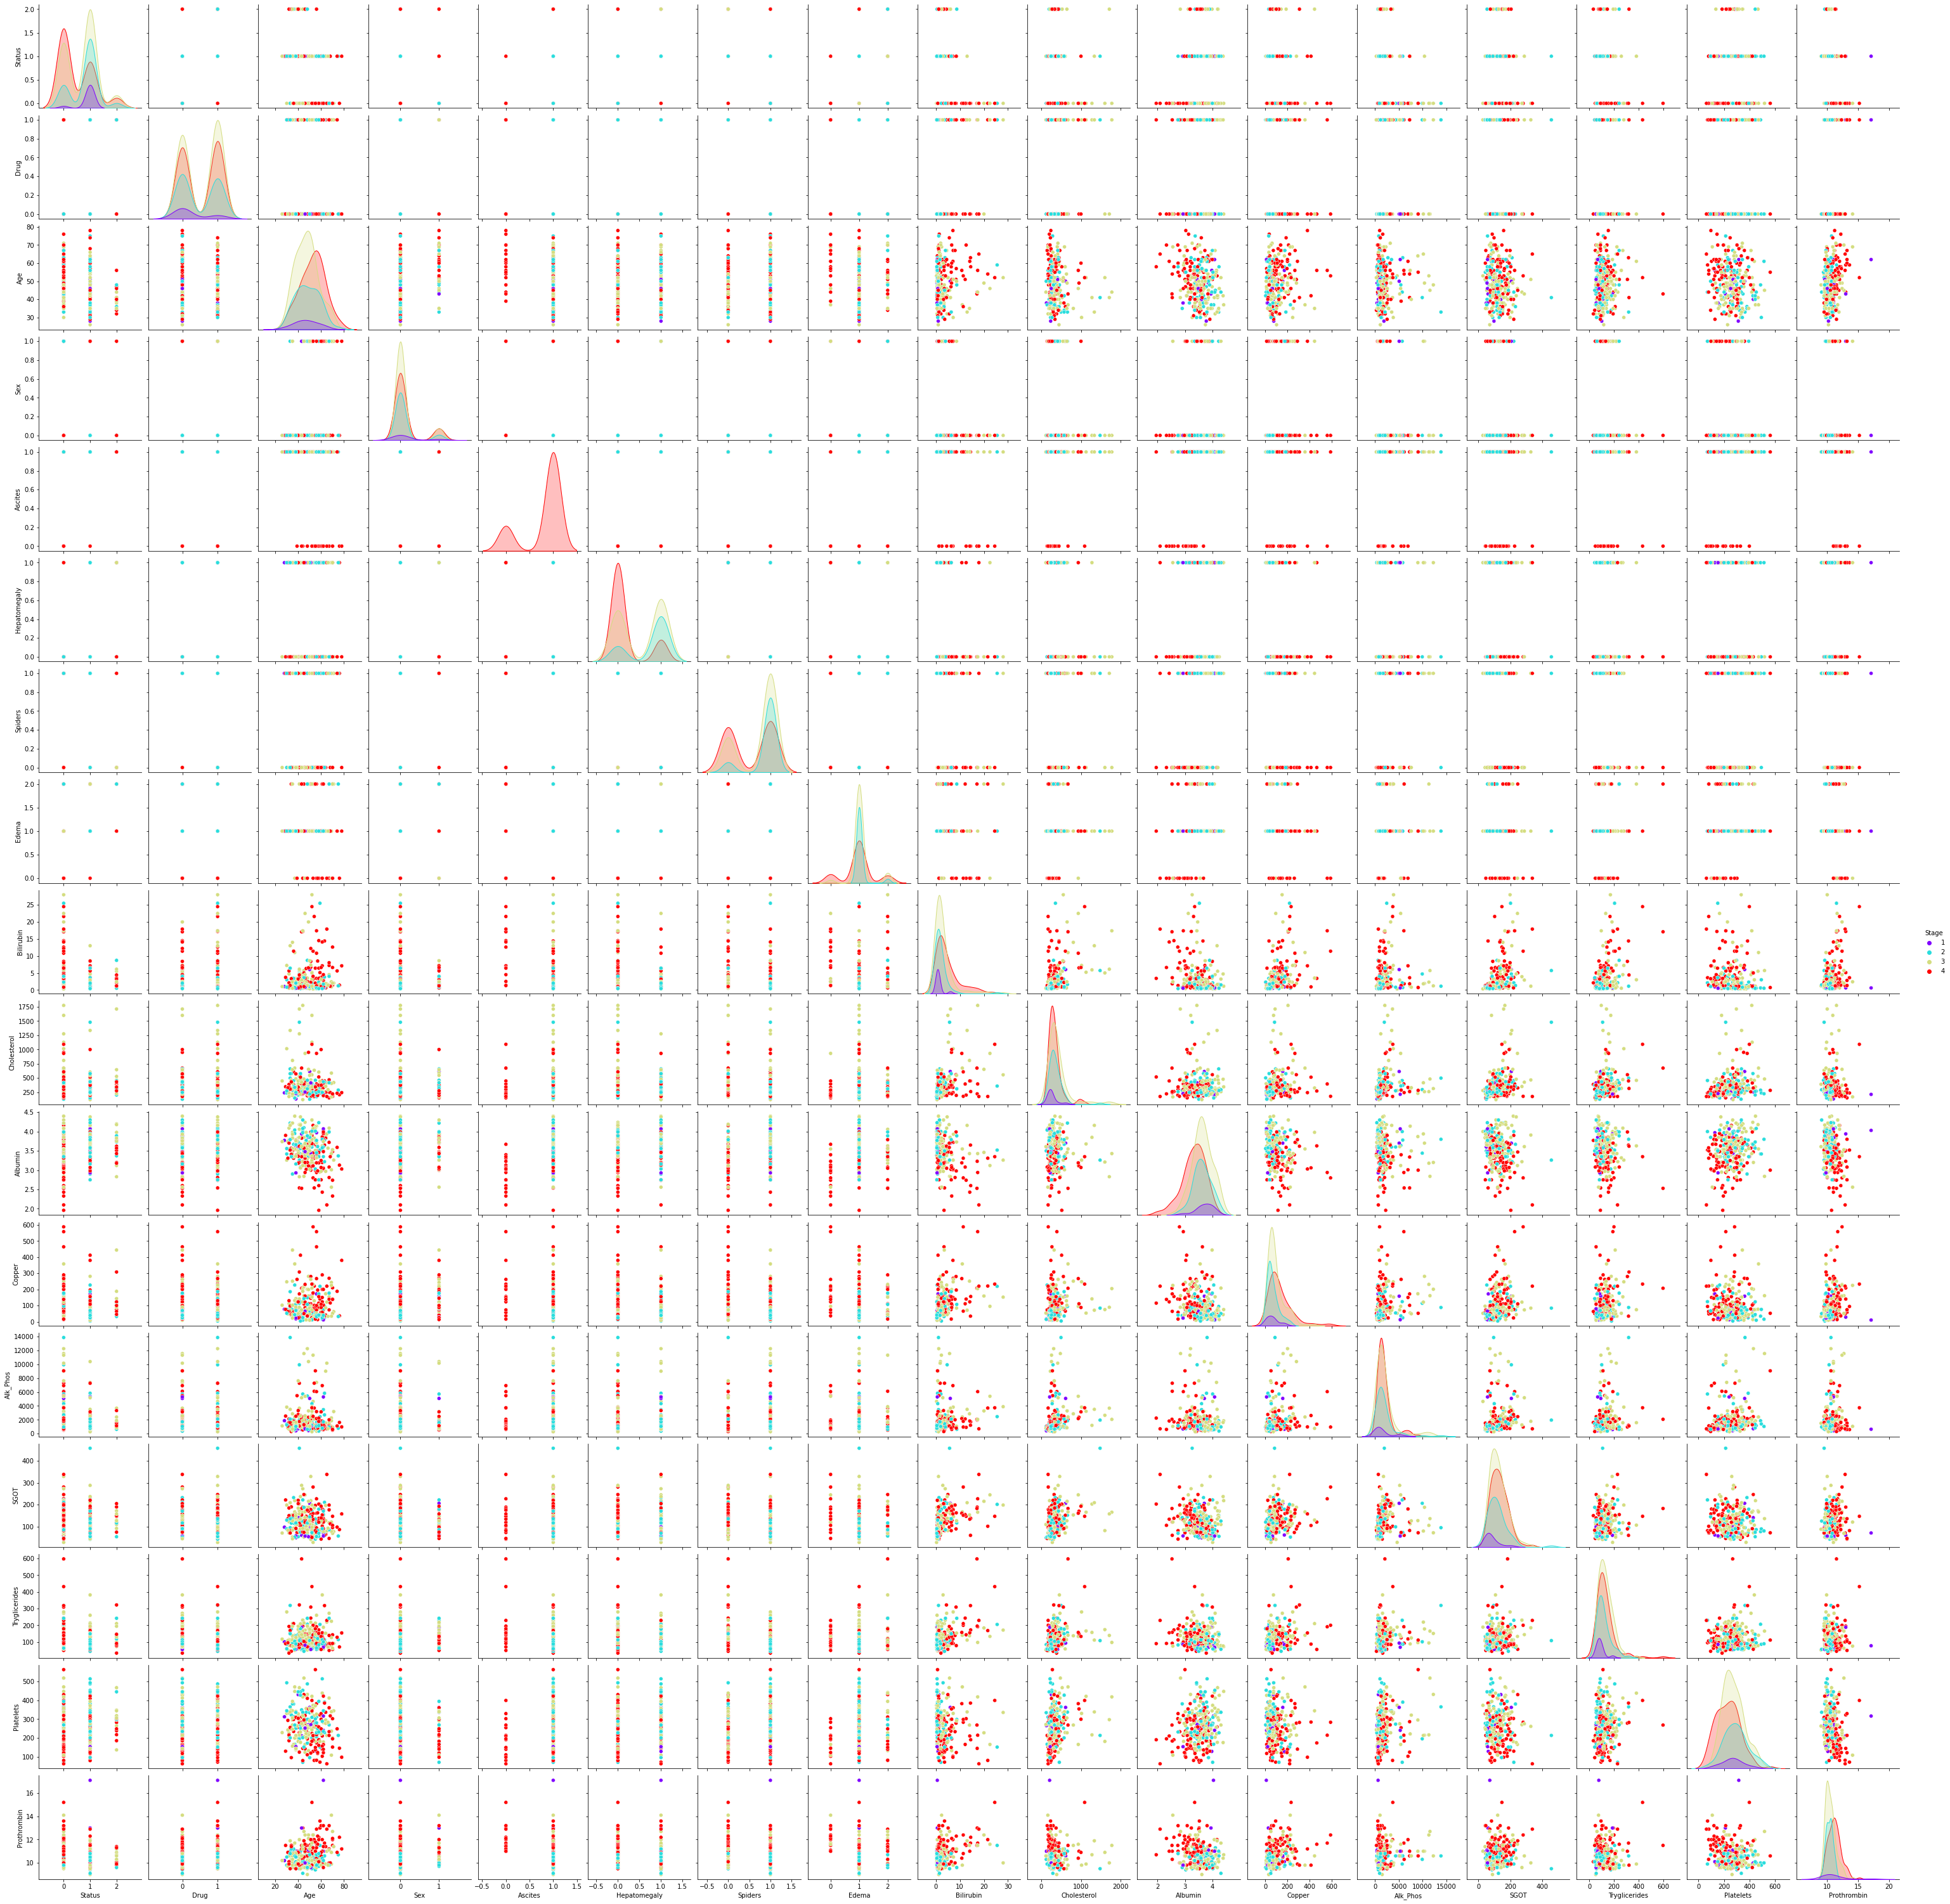

In [102]:
sns.pairplot(df_numeric.iloc[:,1:], hue = 'Stage', palette='rainbow')
plt.show()

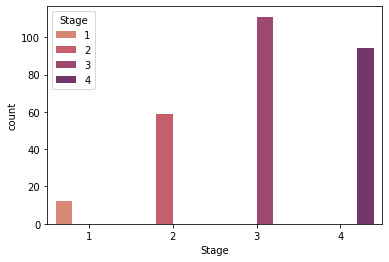

In [103]:
sns.countplot(x="Stage", hue="Stage", data=df, palette='flare')
plt.show()

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         276 non-null    int64  
 1   Status         276 non-null    int64  
 2   Drug           276 non-null    int64  
 3   Age            276 non-null    int64  
 4   Sex            276 non-null    int64  
 5   Ascites        276 non-null    int64  
 6   Hepatomegaly   276 non-null    int64  
 7   Spiders        276 non-null    int64  
 8   Edema          276 non-null    int64  
 9   Bilirubin      276 non-null    float64
 10  Cholesterol    276 non-null    float64
 11  Albumin        276 non-null    float64
 12  Copper         276 non-null    float64
 13  Alk_Phos       276 non-null    float64
 14  SGOT           276 non-null    float64
 15  Tryglicerides  276 non-null    float64
 16  Platelets      276 non-null    float64
 17  Prothrombin    276 non-null    float64
 18  Stage     

Text(0.5, 1.0, 'Number of Example Per Class')

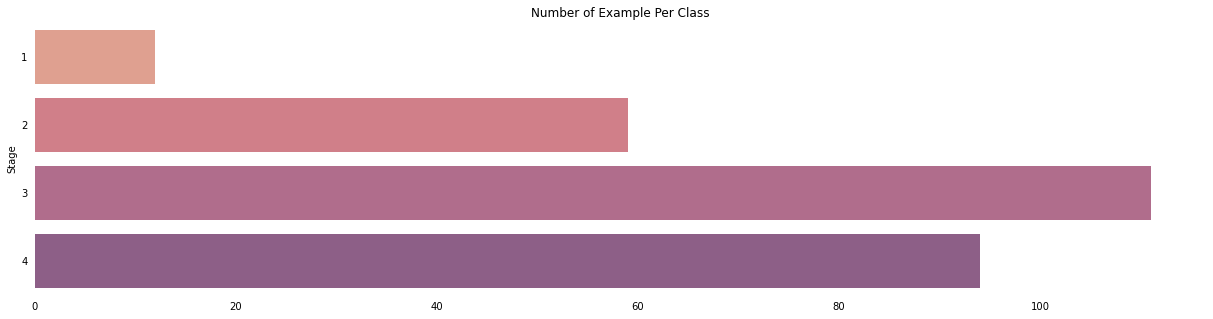

In [105]:
plt.figure(figsize=(21,5))
sns.countplot(y=df['Stage'], palette="flare", alpha=0.8, )
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Example Per Class')